In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datajoint as dj
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_style('ticks', rc={'image.cmap': 'bwr'})

import os
import sys
import inspect

p = !pwd
p = os.path.dirname(os.path.dirname(p[0]))
if p not in sys.path:
    sys.path.append(p)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from cnn_sys_ident.mesonet.data import MultiDataset
from cnn_sys_ident.mesonet.parameters import Core, Readout, Model, RegPath, Fit
from cnn_sys_ident.mesonet import MODELS
from cnn_sys_ident.mesonet.controls import FitTrialSubset

Connecting aecker@52.202.15.166:3306


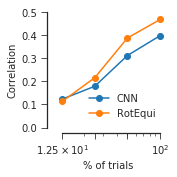

In [20]:
plt.figure(figsize=(2.5, 2.5))

frac_trials = np.array([0.125, 0.25, 0.5, 1])
for model in [MODELS['CNNSparse'], MODELS['HermiteSparse']]:
    test_corr = []
    for t in frac_trials + 0.01:
        rel = (FitTrialSubset() * model & 'frac_trials < {}'.format(t))
        test_corr.append(rel.fetch('test_corr', order_by='val_loss', limit=1)[0])

    plt.semilogx(100 * frac_trials, test_corr, 'o-')
    
plt.legend(['CNN', 'RotEqui'])
plt.xlabel('% of trials')
plt.ylabel('Correlation')
plt.tight_layout()
plt.xlim([10, 110])
plt.ylim([0, 0.5])
plt.xticks(frac_trials * 100)
sns.despine(trim=True, offset=5)
plt.savefig('figures/frac_trials.eps', format='eps')